# Лабораторная работа №4

<b>ФИО:</b> Табуринский Яков Андреевич  
<b>Группа:</b> БИВТ-21-4

Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

In [454]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

# 1. Импорт данных

In [455]:
data = pd.read_csv('https://github.com/TaburinskyYakov1/Taburinsky_Yakov_BIVT-21-4/raw/main/insurance.csv')

# 2. Тип задачи

In [456]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


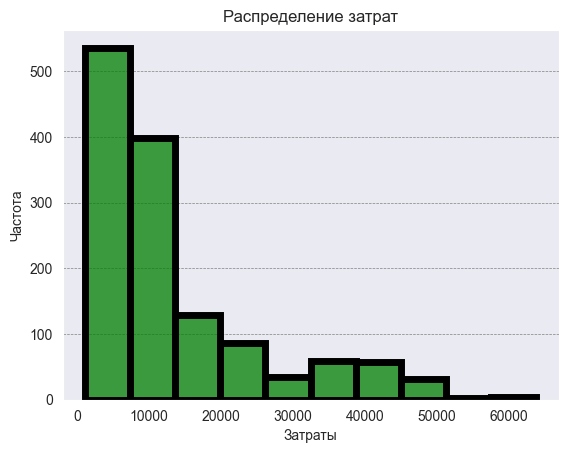

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установка зеленого цвета
color = 'green'

# Настройка общего стиля графика
sns.set_style("dark")

# Построение гистограммы с указанием цвета и другими параметрами
sns.histplot(data=data, x='charges', bins=10, color=color, edgecolor='black', linewidth=5)
plt.title("Распределение затрат")
plt.xlabel("Затраты")
plt.ylabel("Частота")
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=0.5)

plt.show()

Перед нами задача регрессии.

# 3. Предобработка данных

## Логарифмирование

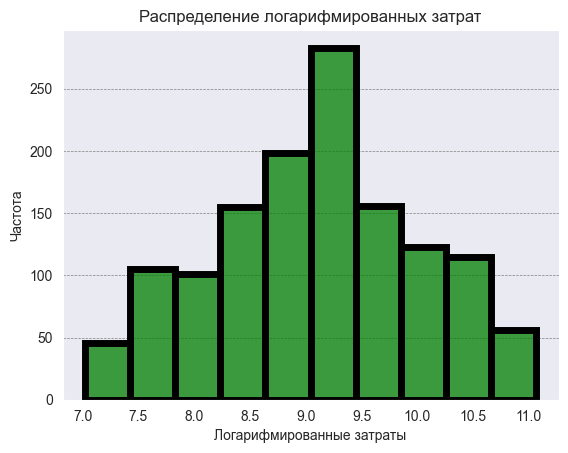

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Логарифмирование значений 'charges'
data['charges'] = np.log(data['charges'])

# Установка зеленого цвета
color = 'green'

# Настройка общего стиля графика
sns.set_style("dark")

# Построение гистограммы с указанием цвета и другими параметрами
sns.histplot(data=data, x='charges', bins=10, color=color, edgecolor='black', linewidth=5)
plt.title("Распределение логарифмированных затрат")
plt.xlabel("Логарифмированные затраты")
plt.ylabel("Частота")
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=0.5)

In [459]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


## Проверка и ликвидация пропусков

In [460]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Кодирование категориальных данных

In [461]:
from sklearn.preprocessing import LabelEncoder

data['sex'] = LabelEncoder().fit_transform(data['sex'])
data['smoker'] = LabelEncoder().fit_transform(data['smoker'])
data['region'] = LabelEncoder().fit_transform(data['region'])

## Разделение выборки на тренировочную и тестовую

In [462]:
X = data.drop(['charges'], axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [463]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 6)
X_test shape: (268, 6)
y_train shape: (1070,)
y_test shape: (268,)


## Нормирование численных переменных

In [464]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [465]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

# 4. Класс Datasets

In [466]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision.transforms import ToTensor, Normalize, Lambda
import copy
import datetime as dt
import pandas as pd
import numpy as np

In [467]:
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data.select_dtypes(include=[np.number])
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = torch.tensor(self.data.iloc[index], dtype=torch.float32)
        y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)

        return x, y

In [468]:
train_dataset = CustomDataset(X_train_df, y_train_df)
test_dataset = CustomDataset(X_test_df, y_test_df)

In [469]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [470]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[0.0217, 1.0000, 0.5145, 0.0000, 1.0000, 1.0000],
        [0.8043, 1.0000, 0.3807, 0.0000, 0.0000, 1.0000],
        [0.0870, 1.0000, 0.4306, 0.0000, 0.0000, 0.0000],
        [0.7174, 1.0000, 0.4462, 0.2000, 0.0000, 0.0000],
        [0.4130, 1.0000, 0.5524, 0.0000, 0.0000, 0.6667],
        [0.9348, 0.0000, 0.4743, 0.8000, 0.0000, 0.6667],
        [0.0435, 0.0000, 0.1764, 0.0000, 1.0000, 0.3333],
        [0.0217, 1.0000, 0.2750, 0.2000, 1.0000, 0.3333],
        [0.3261, 0.0000, 0.0856, 0.4000, 1.0000, 0.0000],
        [0.3261, 0.0000, 0.0694, 0.2000, 0.0000, 1.0000],
        [0.5652, 1.0000, 0.1686, 0.4000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.6330, 0.0000, 0.0000, 0.0000],
        [0.2391, 1.0000, 0.4747, 0.4000, 0.0000, 0.3333],
        [0.0000, 1.0000, 0.4954, 0.0000, 0.0000, 0.6667],
        [0.2826, 1.0000, 0.3424, 1.0000, 0.0000, 0.0000],
        [0.5870, 0.0000, 0.3191, 0.2000, 0.0000, 0.3333],
        [0.0217, 1.0000, 0.5309, 0.0000, 0.0000, 1.0000],
      

C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


# 5. Обучение на тренировочном множестве

In [471]:
from torch import nn

## Однослойная нейросеть

In [472]:
input_size = 6
output_size = 1
learning_rate = 1e-2

In [473]:
first_model = nn.Linear(input_size, output_size)

In [474]:
loss_fn1 = nn.MSELoss()
first_optimizer =  torch.optim.SGD(first_model.parameters(), lr=learning_rate)

In [475]:
first_model.train()

Linear(in_features=6, out_features=1, bias=True)

In [476]:
num_epochs = 25

In [477]:
train_losses = []
test_losses = []

In [478]:
def calculate_loss(model, loss_fn, data_loader):
    total_loss = 0.0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_samples += inputs.size(0)
    return total_loss / total_samples

for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:
        first_optimizer.zero_grad()
        outputs = first_model(inputs)
        loss = loss_fn1(outputs, targets)
        loss.backward()
        first_optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    first_model.eval()
    test_loss = calculate_loss(first_model, loss_fn1, test_loader)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Epoch 1/25, Train Loss: 44.6884, Test Loss: 19.7602
Epoch 2/25, Train Loss: 12.8986, Test Loss: 6.4677
Epoch 3/25, Train Loss: 5.0141, Test Loss: 3.2688
Epoch 4/25, Train Loss: 2.9400, Test Loss: 2.4358
Epoch 5/25, Train Loss: 2.2978, Test Loss: 2.1485
Epoch 6/25, Train Loss: 2.0260, Test Loss: 1.9790
Epoch 7/25, Train Loss: 1.8535, Test Loss: 1.8384
Epoch 8/25, Train Loss: 1.7151, Test Loss: 1.7106
Epoch 9/25, Train Loss: 1.5963, Test Loss: 1.5917
Epoch 10/25, Train Loss: 1.4891, Test Loss: 1.4816
Epoch 11/25, Train Loss: 1.3929, Test Loss: 1.3831
Epoch 12/25, Train Loss: 1.3058, Test Loss: 1.2923
Epoch 13/25, Train Loss: 1.2274, Test Loss: 1.2103
Epoch 14/25, Train Loss: 1.1557, Test Loss: 1.1350
Epoch 15/25, Train Loss: 1.0914, Test Loss: 1.0677
Epoch 16/25, Train Loss: 1.0317, Test Loss: 1.0059
Epoch 17/25, Train Loss: 0.9780, Test Loss: 0.9487
Epoch 18/25, Train Loss: 0.9288, Test Loss: 0.8953
Epoch 19/25, Train Loss: 0.8836, Test Loss: 0.8464
Epoch 20/25, Train Loss: 0.8421, Test

В данном случае, значение потерь на тестовой выборке (0.6298) немного ниже, чем на обучающей выборке (0.6798). Это может указывать на то, что модель хорошо обобщает данные на новых данных, и нет явных признаков переобучения. Разница в потерях не критически велика, что говорит о том, что модель может быть приемлемой для использования.

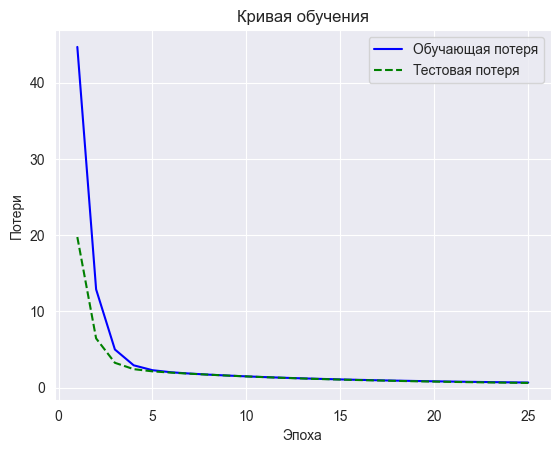

In [479]:
import seaborn as sns
import matplotlib.pyplot as plt

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение графиков для обучающей и тестовой потерь
plt.plot(range(1, num_epochs+1), train_losses, label='Обучающая потеря', color='blue', linestyle='-')
plt.plot(range(1, num_epochs+1), test_losses, label='Тестовая потеря', color='green', linestyle='--')

plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('Кривая обучения')
plt.legend()
plt.grid(True)
plt.show()

## Нейросеть с одним скрытым слоем

In [480]:
hidden_size = 4

In [481]:
second_model = nn.Sequential()
second_model.add_module("first", nn.Linear(input_size, hidden_size))
second_model.add_module("first_activation", nn.Sigmoid())
second_model.add_module("second", nn.Linear(hidden_size, output_size))

In [482]:
loss_fn2 = nn.MSELoss()
second_optimizer = torch.optim.Adam(second_model.parameters(), lr=learning_rate)
second_model.train()

Sequential(
  (first): Linear(in_features=6, out_features=4, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=4, out_features=1, bias=True)
)

In [483]:
train_losses = []
test_losses = []

In [484]:
def calculate_loss(model, loss_fn, data_loader):
    total_loss = 0.0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_samples += inputs.size(0)
    return total_loss / total_samples

for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:
        second_optimizer.zero_grad()
        outputs = second_model(inputs)
        loss = loss_fn2(outputs, targets)
        loss.backward()
        second_optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    first_model.eval()
    test_loss = calculate_loss(second_model, loss_fn2, test_loader)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Epoch 1/25, Train Loss: 74.6203, Test Loss: 65.8628
Epoch 2/25, Train Loss: 60.6968, Test Loss: 51.9326
Epoch 3/25, Train Loss: 47.1922, Test Loss: 39.4234
Epoch 4/25, Train Loss: 35.5944, Test Loss: 29.2215
Epoch 5/25, Train Loss: 26.3236, Test Loss: 21.2936
Epoch 6/25, Train Loss: 19.1850, Test Loss: 15.2779
Epoch 7/25, Train Loss: 13.7940, Test Loss: 10.8045
Epoch 8/25, Train Loss: 9.7896, Test Loss: 7.5563
Epoch 9/25, Train Loss: 6.8915, Test Loss: 5.2353
Epoch 10/25, Train Loss: 4.8278, Test Loss: 3.6228
Epoch 11/25, Train Loss: 3.3996, Test Loss: 2.5229
Epoch 12/25, Train Loss: 2.4272, Test Loss: 1.8016
Epoch 13/25, Train Loss: 1.7781, Test Loss: 1.3449
Epoch 14/25, Train Loss: 1.3669, Test Loss: 1.0572
Epoch 15/25, Train Loss: 1.1029, Test Loss: 0.8882
Epoch 16/25, Train Loss: 0.9419, Test Loss: 0.7918
Epoch 17/25, Train Loss: 0.8450, Test Loss: 0.7391
Epoch 18/25, Train Loss: 0.7886, Test Loss: 0.7118
Epoch 19/25, Train Loss: 0.7561, Test Loss: 0.6984
Epoch 20/25, Train Loss: 0

В данном случае, значения Train Loss и Test Loss очень близки друг к другу. Это может указывать на то, что модель не переобучена (так как ошибка на тренировочных данных не сильно ниже, чем на тестовых данных), но также значение loss близко к нулю, это указывает на то, что модель хорошо справляется с задачей. 

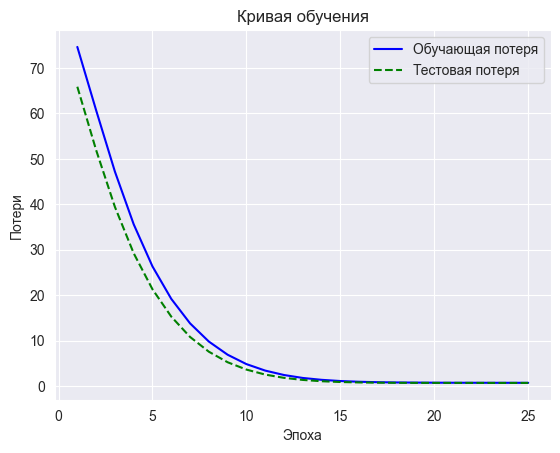

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение графика для обучающей потери с синей линией
plt.plot(range(1, num_epochs+1), train_losses, label='Обучающая потеря', color='blue')

# Построение графика для тестовой потери с зеленой пунктирной линией
plt.plot(range(1, num_epochs+1), test_losses, label='Тестовая потеря', color='green', linestyle='--')

plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('Кривая обучения')
plt.legend()
plt.grid(True)
plt.show()

## Нейросеть с тремя скрытыми слоями

In [486]:
hidden_size1 = 5
hidden_size2 = 4
hidden_size3 = 2

In [487]:
third_model = nn.Sequential()
third_model.add_module("first", nn.Linear(input_size, hidden_size1))
third_model.add_module("first_activation", nn.Sigmoid())
third_model.add_module("second", nn.Linear(hidden_size1, hidden_size2))
third_model.add_module("second_activation", nn.Sigmoid())
third_model.add_module("third", nn.Linear(hidden_size2, hidden_size3))
third_model.add_module("third_activation", nn.Sigmoid())
third_model.add_module("fourth", nn.Linear(hidden_size3, output_size))

In [488]:
loss_fn3 = nn.MSELoss()
third_optimizer = torch.optim.Adam(third_model.parameters(), lr=learning_rate)
third_model.train()

Sequential(
  (first): Linear(in_features=6, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=4, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=4, out_features=2, bias=True)
  (third_activation): Sigmoid()
  (fourth): Linear(in_features=2, out_features=1, bias=True)
)

In [489]:
train_losses = []
test_losses = []

In [490]:
def calculate_loss(model, loss_fn, data_loader):
    total_loss = 0.0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_samples += inputs.size(0)
    return total_loss / total_samples

for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:
        third_optimizer.zero_grad()
        outputs = third_model(inputs)
        loss = loss_fn3(outputs, targets)
        loss.backward()
        third_optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    first_model.eval()
    test_loss = calculate_loss(third_model, loss_fn3, test_loader)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Epoch 1/25, Train Loss: 86.6861, Test Loss: 81.4333
Epoch 2/25, Train Loss: 79.2641, Test Loss: 73.4783
Epoch 3/25, Train Loss: 70.6867, Test Loss: 64.3377
Epoch 4/25, Train Loss: 60.9642, Test Loss: 54.3202
Epoch 5/25, Train Loss: 51.1166, Test Loss: 45.2725
Epoch 6/25, Train Loss: 42.8499, Test Loss: 38.0613
Epoch 7/25, Train Loss: 36.1919, Test Loss: 32.1311
Epoch 8/25, Train Loss: 30.6259, Test Loss: 27.1280
Epoch 9/25, Train Loss: 25.9130, Test Loss: 22.8347
Epoch 10/25, Train Loss: 21.8506, Test Loss: 19.1859
Epoch 11/25, Train Loss: 18.3902, Test Loss: 16.0582
Epoch 12/25, Train Loss: 15.4239, Test Loss: 13.3971
Epoch 13/25, Train Loss: 12.9012, Test Loss: 11.1373
Epoch 14/25, Train Loss: 10.7562, Test Loss: 9.2343
Epoch 15/25, Train Loss: 8.9486, Test Loss: 7.6369
Epoch 16/25, Train Loss: 7.4302, Test Loss: 6.3051
Epoch 17/25, Train Loss: 6.1683, Test Loss: 5.1955
Epoch 18/25, Train Loss: 5.1192, Test Loss: 4.2844
Epoch 19/25, Train Loss: 4.2533, Test Loss: 3.5454
Epoch 20/25, 

Разница между Train Loss и Test Loss не очень большая. В целом, такие значения могут свидетельствовать о том, что модель не достигла оптимальной производительности и возможно потребуется улучшения (например, увеличение эпох).

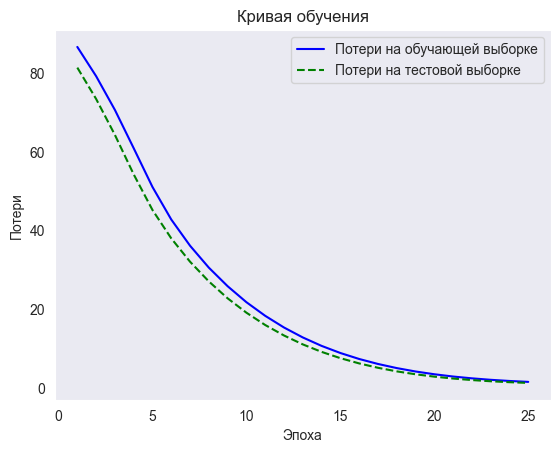

In [491]:
import seaborn as sns
import matplotlib.pyplot as plt

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение графика для потерь на обучающей выборке со сплошной линией
plt.plot(range(1, num_epochs+1), train_losses, label='Потери на обучающей выборке', color='blue')

# Построение графика для потерь на тестовой выборке с пунктирной линией
plt.plot(range(1, num_epochs+1), test_losses, label='Потери на тестовой выборке', color='green', linestyle='--')

plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('Кривая обучения')
plt.legend()
plt.show()

# 6. Метрики mae

In [492]:
from sklearn.metrics import mean_absolute_error

## Однослойная нейросеть

In [493]:
train_predictions = []
train_targets = []

for inputs, targets in train_loader:
    predictions = first_model(inputs).detach().numpy()
    train_predictions.extend(predictions)

    train_targets.extend(targets.numpy())

train_mae = mean_absolute_error(train_targets, train_predictions)
print("Train test \n MAE:", train_mae)

Train test 
 MAE: 0.6425357


C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


In [494]:
test_predictions = []
test_targets = []

for inputs, targets in test_loader:
    predictions = first_model(inputs).detach().numpy()
    test_predictions.extend(predictions)
    
    test_targets.extend(targets.numpy())

test_mae = mean_absolute_error(test_targets, test_predictions)
print("Test test \n MAE:", test_mae)

Test test 
 MAE: 0.62320393


C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


В результате для тренировочной выборки была получена метрика mae, равная 0.62. Иэ этого следует, что предсказанные значения близки к истинным значениям. Кроме того для тестовой выборки значение метрики также недалеки от нуля, что указывает на то, что модель хорошо обучается на новых данных. В целом разница между MAE для тренировочного и тестового наборов данных не очень велика.

## Нейросеть с одним скрытым слоем

In [495]:
train_predictions = []
train_targets = []

for inputs, targets in train_loader:
    predictions = second_model(inputs).detach().numpy()
    train_predictions.extend(predictions)

    train_targets.extend(targets.numpy())

train_mae = mean_absolute_error(train_targets, train_predictions)
print("Train test \n MAE:", train_mae)

C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Train test 
 MAE: 0.6720109


In [496]:
test_predictions = []
test_targets = []

for inputs, targets in test_loader:
    predictions = second_model(inputs).detach().numpy()
    test_predictions.extend(predictions)
    
    test_targets.extend(targets.numpy())

test_mae = mean_absolute_error(test_targets, test_predictions)
print("Test test \n MAE:", test_mae)

C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Test test 
 MAE: 0.66629475


Для тренировочной выборки средняя абсолютная ошибка равна 0.66. Иэ этого следует, что предсказанные значения близки к истинным значениям. В целом MAE для тренировочного набора близка к MAE для тестового наборов данных, что может свидетельствовать о том, что модель обобщает данные довольно неплохо.

## Нейросеть с тремя скрытыми слоями

In [497]:
train_predictions = []
train_targets = []

for inputs, targets in train_loader:
    predictions = third_model(inputs).detach().numpy()
    train_predictions.extend(predictions)

    train_targets.extend(targets.numpy())

train_mae = mean_absolute_error(train_targets, train_predictions)
print("Train test \n MAE:", train_mae)

C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Train test 
 MAE: 1.0302798


In [498]:
test_predictions = []
test_targets = []

for inputs, targets in test_loader:
    predictions = third_model(inputs).detach().numpy()
    test_predictions.extend(predictions)

    test_targets.extend(targets.numpy())

test_mae = mean_absolute_error(test_targets, test_predictions)
print("Test test \n MAE:", test_mae)

Test test 
 MAE: 0.94844997


C:\Users\yakov\AppData\Local\Temp\ipykernel_6140\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Результаты метрик достаточно близки к друг другу, что свидетельствует о том, что модель в целом хорошо справилась с обучением.